## Final Project Submission

Please fill out:
* Student name: Muloma Olive Mideva
* Student pace: Full Time
* Scheduled project review date/time: June 7th
* Instructor name: Maryann Mwikali

## KEEPING IBM TALENT : INSIGHTS INTO EMPLOYEE RETENTION

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

The cells below contain code on reading, analyzing and cleaning my dataset

### 1. Reading the Dataset

In [2]:
df = pd.read_csv('Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv', index_col=0)
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


#### Dataset Description

The dataset contains information on employees, focusing on factors that might influence their decision to leave the company (attrition). Here are the columns and their descriptions:

- **Attrition**: Indicates whether an employee has left the company.
  - Example Values: Yes, No

- **BusinessTravel**: Frequency of travel for business purposes.
  - Example Values: Travel_Rarely, Travel_Frequently

- **DailyRate**: Daily salary rate of the employee.
  - Example Values: 1102, 279

- **Department**: Department in which the employee works.
  - Example Values: Sales, Research & Development

- **DistanceFromHome**: Distance from the employee's residence to the workplace.
  - Example Values: 1, 8

- **Education**: Education level of the employee (numerical values representing different education levels).
  - Example Values: 2, 1

- **EducationField**: Field of study of the employee.
  - Example Values: Life Sciences, Medical

- **EmployeeCount**: Total number of employees (usually a placeholder with a value of 1 for each record).
  - Example Value: 1

- **EmployeeNumber**: Unique identifier for each employee.
  - Example Values: 1, 2

- **EnvironmentSatisfaction**: Employee's satisfaction with the work environment (scale 1-4).
  - Example Values: 2, 4

- **Gender**: Gender of the employee.
  - Example Values: Male, Female

- **HourlyRate**: Hourly wage of the employee.
  - Example Values: 94, 61

- **JobInvolvement**: Employee's involvement in their job (scale 1-4).
  - Example Values: 3, 2

- **JobLevel**: Level of the job position (numerical values representing different levels).
  - Example Values: 2, 1

- **JobRole**: Role of the employee within the company.
  - Example Values: Sales Executive, Research Scientist

- **JobSatisfaction**: Employee's satisfaction with their job (scale 1-4).
  - Example Values: 3, 2

- **MaritalStatus**: Marital status of the employee.
  - Example Values: Single, Married

- **MonthlyIncome**: Monthly salary of the employee.
  - Example Values: 5993, 5130

- **MonthlyRate**: Monthly billing rate of the employee.
  - Example Values: 19479, 24907

- **NumCompaniesWorked**: Number of companies the employee has worked for.
  - Example Values: 8, 1

- **Over18**: Indicator if the employee is over 18 years old (usually a placeholder).
  - Example Value: Y

- **OverTime**: Indicates if the employee works overtime.
  - Example Values: Yes, No

- **PercentSalaryHike**: Percentage increase in salary.
  - Example Values: 11, 13

- **PerformanceRating**: Employee's performance rating (scale 1-4).
  - Example Values: 3, 4

- **RelationshipSatisfaction**: Satisfaction with relationships at work (scale 1-4).
  - Example Values: 1, 4

- **StandardHours**: Standard working hours (usually fixed, e.g., 80 hours bi-weekly).
  - Example Value: 80

- **StockOptionLevel**: Employee's stock option level (scale 0-3).
  - Example Values: 0, 1

- **TotalWorkingYears**: Total number of years the employee has worked in their career.
  - Example Values: 8, 10

- **TrainingTimesLastYear**: Number of training sessions attended by the employee last year.
  - Example Values: 0, 3

- **WorkLifeBalance**: Employee's work-life balance rating (scale 1-4).
  - Example Values: 1, 3

- **YearsAtCompany**: Number of years the employee has been with the company.
  - Example Values: 6, 10

- **YearsInCurrentRole**: Number of years the employee has been in their current role.
  - Example Values: 4, 7

- **YearsSinceLastPromotion**: Number of years since the employee's last promotion.
  - Example Values: 0, 1

- **YearsWithCurrManager**: Number of years the employee has worked with their current manager.
  - Example Values: 5, 7

#### Usage
This dataset is used to analyze and predict employee attrition. By understanding the factors contributing to employee turnover, companies can develop strategies to improve retention. The dataset includes both numerical and categorical data, making it suitable for various analysis and machine learning techniques.

In [3]:
df.shape

(1470, 34)

The dataset contains 1470 rows and 34 columns according to the output above

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                  

From the above output above we get that:

- Total entries: 1470
- Total columns: 35
- Non-null entries for each column: 1470
- Data types: Mix of integers, floats, and objects (categorical data)
- Memory usage: Approximately 402.4+ KB

### 2. Cleaning the Dataset

1. **Check for null values**

In [5]:
df.isna().sum()

Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

According to the above my dataset has no null values

 2. **Check for duplicates**

In [6]:
duplicates_with_rows = df[df.duplicated()]
duplicates_with_rows

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,


The dataset also has no duplicates. This dataset therefore needs no cleaning.

### 3. Descriptive Analysis

In [7]:
df.describe()

,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## EDA(Exploratory Data Analysis)

In this section there is a deep dive into the dataset using visualizations. It helps in feature importance, class distribution, and relationships between features and the target variable.

### 1. Class Imbalance

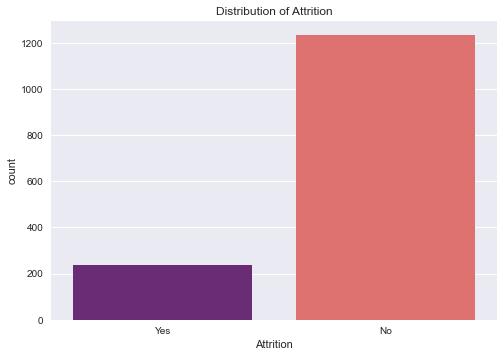

In [8]:
sns.countplot(data=df, x='Attrition', palette="magma")
plt.title('Distribution of Attrition')
plt.show()

### 2. Checking for outliers

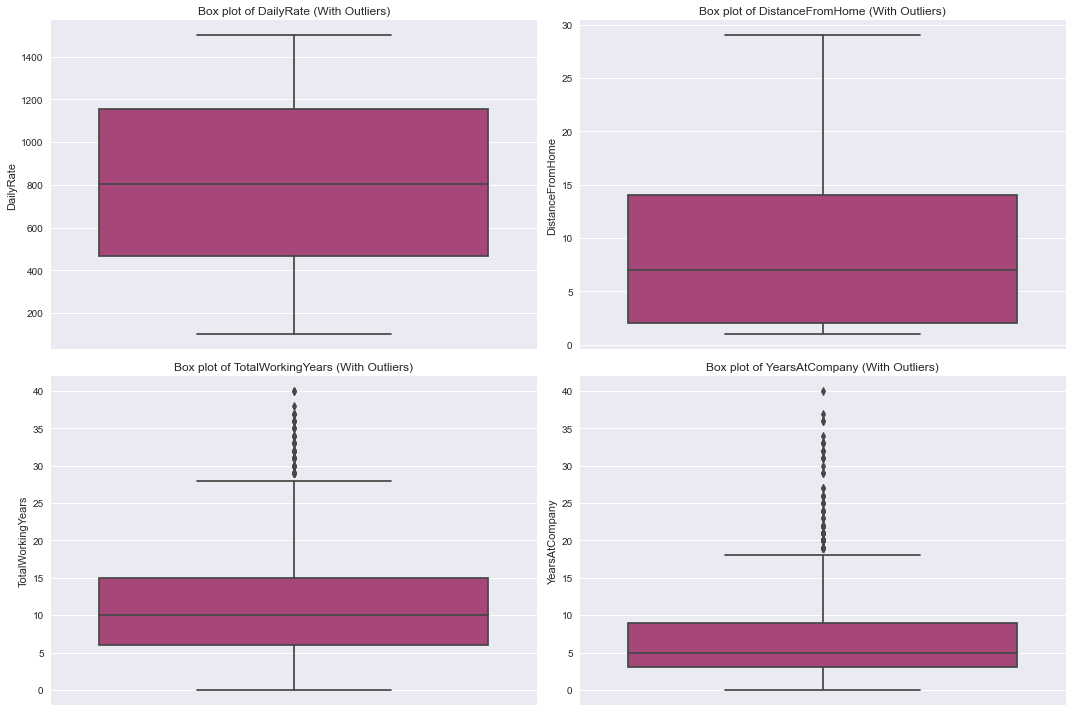

In [9]:
def plot_boxplots_with_outliers(df, numerical_columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(data=df, y=col, palette="magma")
        plt.title(f'Box plot of {col} (With Outliers)')
    plt.tight_layout()
    plt.show()

# Numerical features    
numerical_columns = ['DailyRate', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']

# Plot box plots with outliers
plot_boxplots_with_outliers(df, numerical_columns)


My dataset has outliers but I am not removing them because it might affect my accuracy because they are important values needed for the dataset. Removing values from the columns 'TotalWorkingYears' and 'YearsAtCompany' will lead to loss of valuable information.

### 3. Pair plot

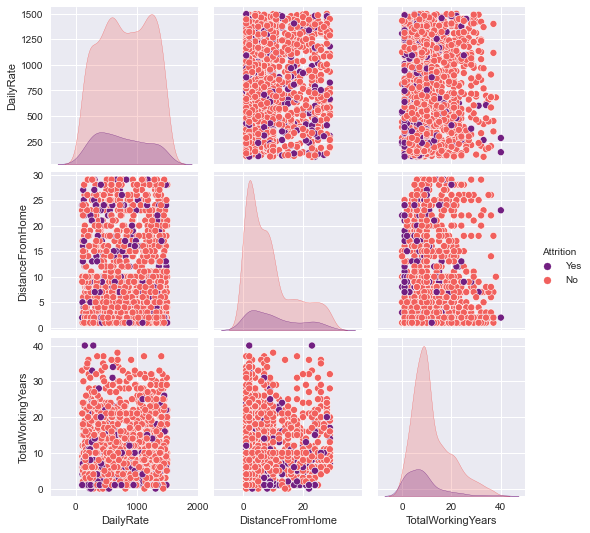

In [10]:
sns.pairplot(df, hue='Attrition', vars=['DailyRate', 'DistanceFromHome', 'TotalWorkingYears'], palette="magma")
plt.show()

The above explores the relationships between pairs of numerical features and attrition.

### 4. Bar plot

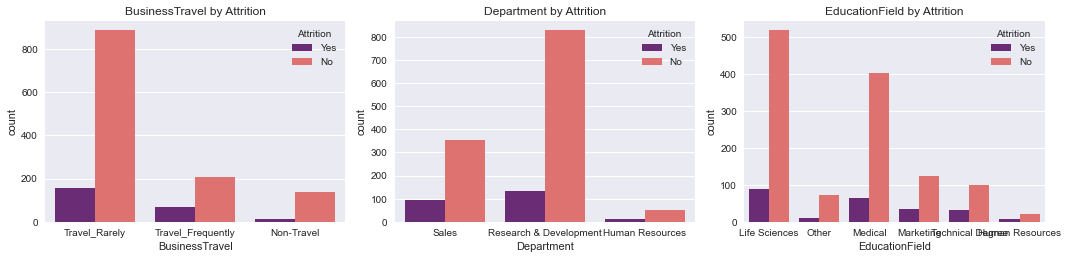

In [11]:
def plot_countplots_with_attrition(df, categorical_columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(x=col, hue='Attrition', data=df, palette="magma")
        plt.title(f'{col} by Attrition')
    plt.tight_layout()
    plt.show()

# Categorical features
categorical_columns = ['BusinessTravel', 'Department', 'EducationField']

# Plot count plots with attrition
plot_countplots_with_attrition(df, categorical_columns)

The above helps to see how categorical features like BusinessTravel, Department, and EducationField vary across the target variable.

## Modelling

### One Hot Encoding

In [12]:
# Categorical columns
categorical_columns = ['Attrition','BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus', 'OverTime', 'Over18']
# One-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Convert boolean columns to binary
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

df.head()

,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,,,,,,,,,,,,,,,,,,,,,
41,1102,1,2,1,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
49,279,8,1,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
37,1373,2,2,1,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
33,1392,3,4,1,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
27,591,2,1,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


### Train Test Split

In [13]:
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [14]:
# Initialize
clf = DecisionTreeClassifier(random_state=42)

In [15]:
# Train
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predictions on test set
y_pred = clf.predict(X_test)

In [17]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.782312925170068


In [18]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       255
           1       0.18      0.18      0.18        39

    accuracy                           0.78       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.78      0.78       294



In [19]:
# Feature importance
feature_importance = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                              Feature  Importance
10                      MonthlyIncome    0.109534
45                       OverTime_Yes    0.078718
6                          HourlyRate    0.068904
0                           DailyRate    0.061263
18                  TotalWorkingYears    0.050856
11                        MonthlyRate    0.050160
1                    DistanceFromHome    0.049528
12                 NumCompaniesWorked    0.045362
23            YearsSinceLastPromotion    0.044499
44               MaritalStatus_Single    0.033560
19              TrainingTimesLastYear    0.030093
7                      JobInvolvement    0.029623
15           RelationshipSatisfaction    0.028190
21                     YearsAtCompany    0.028170
13                  PercentSalaryHike    0.027117
22                 YearsInCurrentRole    0.026266
4                      EmployeeNumber    0.023231
40         JobRole_Research Scientist    0.020199
9                     JobSati

This code segment employs a Decision Tree Classifier to address binary classification tasks. Beginning with the classifier initialization and training on the provided training dataset, it proceeds to predict outcomes on the test set. Model performance is then assessed using the accuracy metric, displaying an achieved accuracy of approximately 78%. Additionally, a classification report offers insights into the precision, recall, F1-score, and support for each class, enhancing understanding of model performance. Lastly, the feature importance is determined, revealing key predictors influencing the model's decisions. This concise yet informative script encapsulates the classifier's training, evaluation, and feature analysis, facilitating effective binary classification tasks.

### Random Forest Classifier

In [20]:
# Initialize
rf_classifier = RandomForestClassifier(random_state=42)

In [21]:
# Train
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predictions on test set
y_pred = rf_classifier.predict(X_test)

In [23]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8741496598639455


In [24]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



In [25]:
# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                              Feature  Importance
10                      MonthlyIncome    0.078538
45                       OverTime_Yes    0.061039
0                           DailyRate    0.052331
11                        MonthlyRate    0.051672
18                  TotalWorkingYears    0.048176
4                      EmployeeNumber    0.046193
1                    DistanceFromHome    0.045684
6                          HourlyRate    0.042980
21                     YearsAtCompany    0.042490
12                 NumCompaniesWorked    0.034854
13                  PercentSalaryHike    0.032783
17                   StockOptionLevel    0.032660
24               YearsWithCurrManager    0.030053
22                 YearsInCurrentRole    0.028498
9                     JobSatisfaction    0.028395
23            YearsSinceLastPromotion    0.027052
5             EnvironmentSatisfaction    0.026759
19              TrainingTimesLastYear    0.025665
15           RelationshipSati

The provided code segment illustrates the utilization of a Random Forest Classifier for a binary classification task. Initially, the Random Forest classifier is instantiated with a specified random state for reproducibility. Next, the classifier is trained using the training data. Following the training phase, predictions are made on the test set, and the model's accuracy is evaluated, yielding an accuracy score of approximately 87.4%. A detailed classification report is generated, offering insights into precision, recall, F1-score, and support for each class, enhancing comprehension of the model's performance. Additionally, feature importance is computed, showcasing the significance of various features in predicting the target variable. This concise script encapsulates the training, evaluation, and feature analysis of the Random Forest Classifier, facilitating robust binary classification tasks.

### Solve Class imbalance

Here we use SMOTE(Synthetic Minority Over_Sampling Technique) to solve the issue of class imbalance

In [26]:
# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset again
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Hyperparameter Tuning

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [28]:
# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

In [29]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [30]:
# Perform grid search
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 20.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [31]:
# Best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.91733727430444


In [32]:
# Make predictions with best model
best_rf = grid_search.best_estimator_
y_pred_resampled = best_rf.predict(X_test_resampled)

In [33]:
# Evaluate best model
accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
print("Accuracy of the best model:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred_resampled))

Accuracy of the best model: 0.9210526315789473

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       250
           1       0.94      0.89      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



In [34]:
# Feature importance
feature_importance = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                              Feature  Importance
17                   StockOptionLevel    0.057209
10                      MonthlyIncome    0.056087
9                     JobSatisfaction    0.045945
7                      JobInvolvement    0.040915
5             EnvironmentSatisfaction    0.039313
43              MaritalStatus_Married    0.038577
11                        MonthlyRate    0.037791
24               YearsWithCurrManager    0.037762
31             EducationField_Medical    0.037374
4                      EmployeeNumber    0.036795
18                  TotalWorkingYears    0.035203
0                           DailyRate    0.034609
8                            JobLevel    0.034546
1                    DistanceFromHome    0.033409
27  Department_Research & Development    0.032992
6                          HourlyRate    0.031562
22                 YearsInCurrentRole    0.031321
21                     YearsAtCompany    0.029396
15           RelationshipSati

This code segment addresses the challenge of class imbalance in a dataset using SMOTE (Synthetic Minority Over-Sampling Technique) to create synthetic samples for the minority class, thus balancing class distribution. It then performs hyperparameter tuning for a Random Forest Classifier via GridSearchCV to optimize model performance. The best-performing model is evaluated, yielding an accuracy of approximately 92%, with a detailed classification report offering insights into precision, recall, and F1-score for each class. Additionally, the feature importance of the best model is determined, showcasing the relative significance of different features in predicting the target variable. Overall, this approach effectively mitigates class imbalance, enhances model performance, and provides valuable insights into feature importance for predictive analytics.

## Visualizations


### 1. Confusion matrix

This table compares actual versus predicted values, detailing True Positives, True Negatives, False Positives, and False Negatives. It provides a detailed view of model performance, enabling us to calculate accuracy, precision, recall, and F1-score.

In [62]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix',figsize=(10, 8)):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Purples)
    plt.title(title)
    plt.show()

### 2. Feature Importance

This measure indicates which features in our dataset have the most impact on the model’s predictions. Higher scores mean greater importance, helping us understand key predictors and guide feature selection and engineering.

In [63]:
def plot_feature_importance(model, X_train):
    feature_importance = model.feature_importances_
    features = X_train.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette="magma")
    plt.title('Feature Importance')
    plt.show()

### 3. ROC Curve

This graph plots the True Positive Rate (sensitivity) against the False Positive Rate, helping us assess the overall performance of our binary classifiers. The area under the curve (AUC) indicates how well the model distinguishes between classes, with values close to 1 showing excellent performance.

In [64]:
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

### Decision Tree Model Visualisations

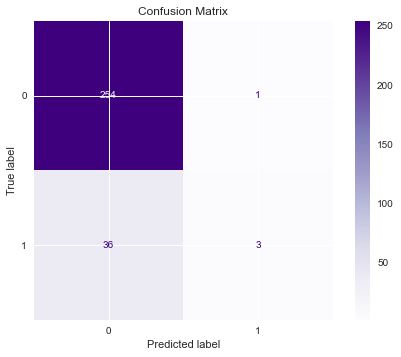

In [66]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, figsize=(12, 10))

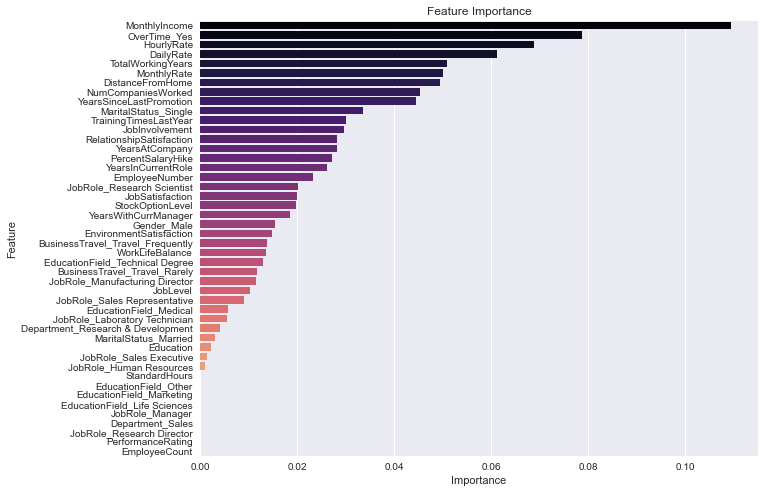

In [67]:
# Plot feature importance 
plot_feature_importance(clf, X_train)

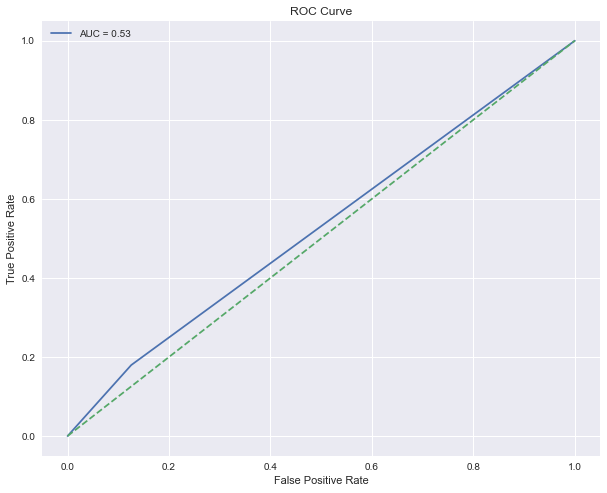

In [68]:
# Plot ROC curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_prob)

### Random Forest Model Visualisations

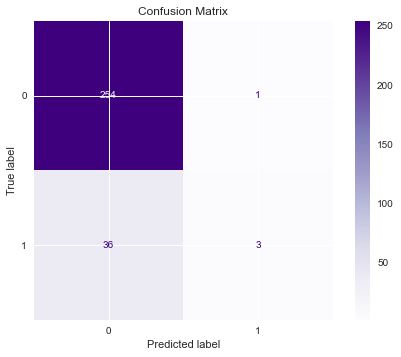

In [69]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, figsize=(12, 10))

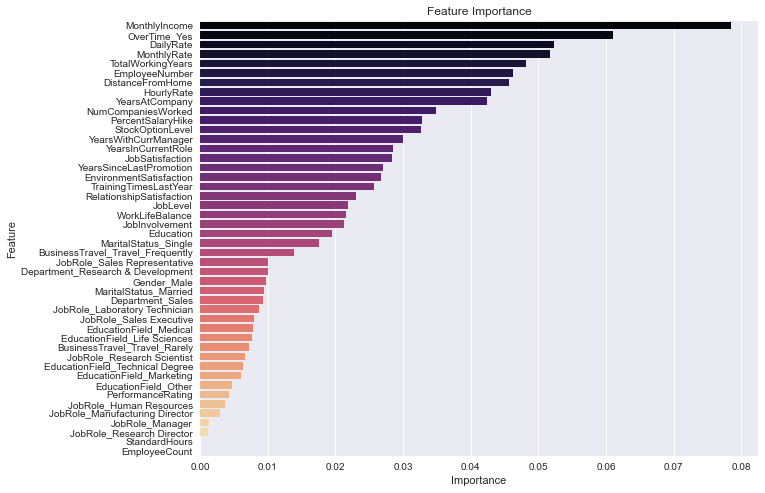

In [70]:
# Plot feature importance
plot_feature_importance(rf_classifier, X_train)

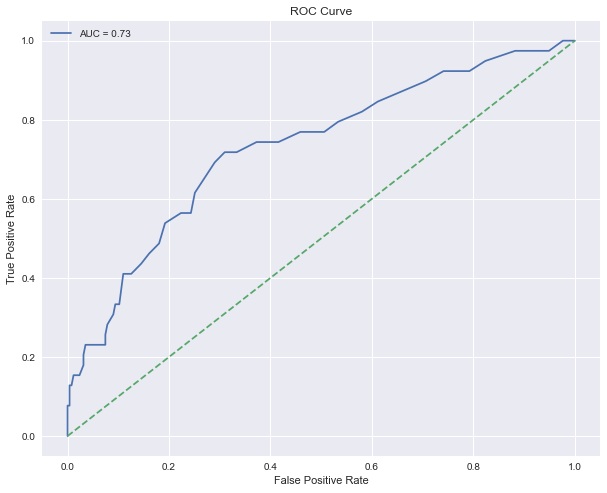

In [71]:
# Plot ROC curve
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_prob)


### Fine Tuned Random Forest Model Visualisations

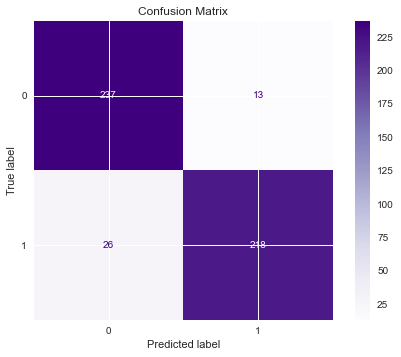

In [72]:
# Plot confusion matrix
plot_confusion_matrix(y_test_resampled, y_pred_resampled, figsize=(12, 10))

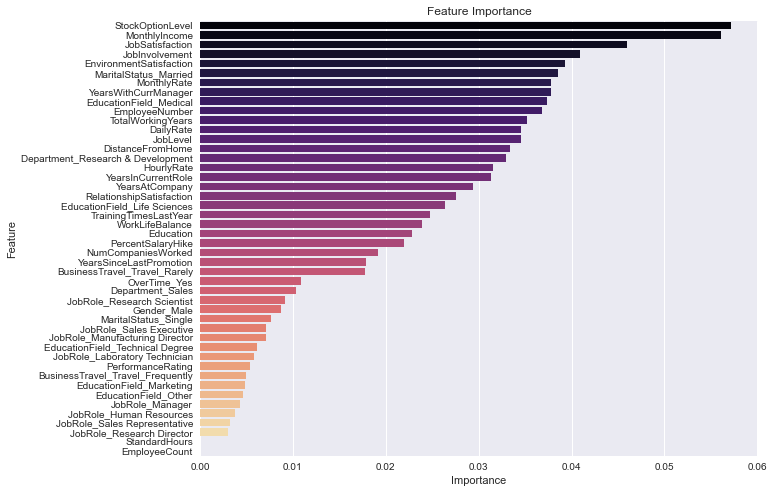

In [73]:
# Plot feature importance 
plot_feature_importance(best_rf, X_train_resampled)

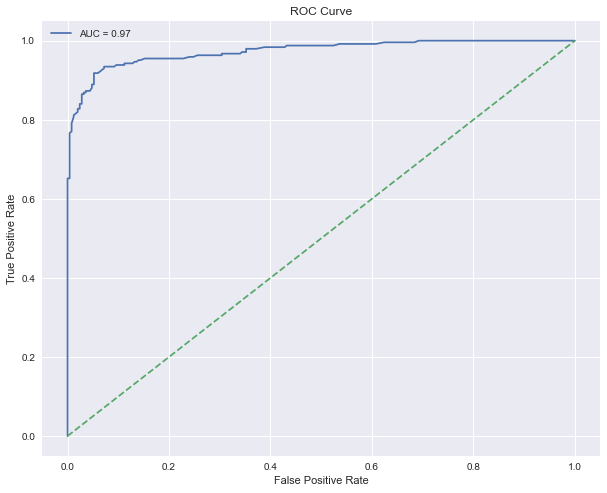

In [74]:
# Plot ROC curve 
y_pred_prob = best_rf.predict_proba(X_test_resampled)[:, 1]
plot_roc_curve(y_test_resampled, y_pred_prob)

## Recommendation

The fine tuned Random Forest Classifier is recommended project due to its superior performance, robustness, and ability to handle class imbalance. With an accuracy of approximately 92.1% after hyperparameter tuning and SMOTE application, this model excels in making accurate predictions on the test dataset. Its ensemble nature and feature importance analysis provide valuable insights into the data, making it suitable for various applications. Overall, the Random Forest Classifier offers a balance of high accuracy, robustness, and practical applicability, making it the optimal choice for your project.